In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [65]:
number_of_drops = 10e9
error_probs = np.array([3229,  12286,  27405,  48506,  75202, 107702, 145786, 188441, 237989, 291439]) / number_of_drops
lambdas = np.arange(0.025, 0.26, 0.025)
print(lambdas)

[0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25 ]


In [66]:
def f(x,a,b):
    return a*x**b

In [67]:
popt, pcov = scipy.optimize.curve_fit(f, lambdas, error_probs)

In [68]:
xpoints = np.linspace(0.01, 0.25, 100)
curve = f(xpoints, *popt)

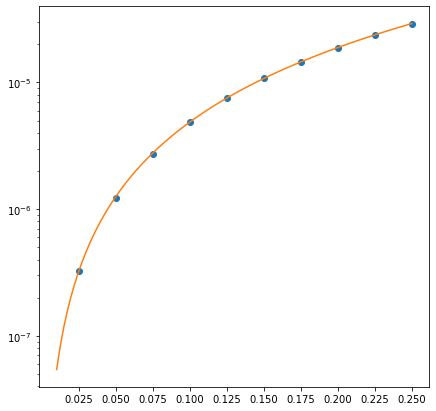

In [69]:
plt.figure(figsize=(7,7))
plt.semilogy(lambdas, error_probs, 'o')
plt.semilogy(xpoints, curve)
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _